# LIBRA and the Liquid Immersion Blanket
## 1L BABY
- Wall permeation
- FLiBe handing (ClLiF)
- Wall materials
- Tritium probe 

In [1]:
import openmc
import matplotlib.pyplot as plt

from run_model import model

isotopes ['Al27', 'Ar36', 'Ar38', 'Ar40', 'B10', 'B11', 'Be9', 'C12', 'C13', 'Ca40', 'Ca42', 'Ca43', 'Ca44', 'Ca46', 'Ca48', 'Co59', 'Cr50', 'Cr52', 'Cr53', 'Cr54', 'F19', 'Fe54', 'Fe56', 'Fe57', 'Fe58', 'H1', 'H2', 'K39', 'K40', 'K41', 'Li6', 'Li7', 'Mg24', 'Mg25', 'Mg26', 'Mn55', 'Mo100', 'Mo92', 'Mo94', 'Mo95', 'Mo96', 'Mo97', 'Mo98', 'N14', 'N15', 'Na23', 'Nb93', 'Ni58', 'Ni60', 'Ni61', 'Ni62', 'Ni64', 'O16', 'O17', 'O18', 'P31', 'Pb204', 'Pb206', 'Pb207', 'Pb208', 'S32', 'S33', 'S34', 'S36', 'Si28', 'Si29', 'Si30', 'Ti46', 'Ti47', 'Ti48', 'Ti49', 'Ti50', 'W180', 'W182', 'W183', 'W184', 'W186', 'Zr90', 'Zr91', 'Zr92', 'Zr94', 'Zr96']
Searching libraries with the following priority {'ENDFB-8.0-NNDC': 1}
Isotopes found matching library requirements 556
Isotopes found matching particle requirements 1789
Isotopes found matching isotope requirements 325
Isotopes found matching all requirements 82
             library remote_file  \
1233  ENDFB-8.0-NNDC       H1.h5   
1234  ENDFB-8.0-NND

In [2]:
sp = openmc.StatePoint("statepoint.100.h5")
tbr = sp.get_tally(name="tritium tally").get_pandas_dataframe()
print(f"tritium tally: {tbr['mean'].iloc[0] :.6e}\n")
print(f"tritium tally std. dev.: {tbr['std. dev.'].iloc[0] :.6e}\n")

tritium tally: 1.071473e+00

tritium tally std. dev.: 3.487430e-04



In [3]:
tbr_mesh_tally = sp.get_tally(name="(n,Xt) tally mesh")
assert isinstance(tbr_mesh_tally, openmc.Tally), "Tally not found"
tbr_mesh = tbr_mesh_tally.get_pandas_dataframe()
tbr_mesh

mesh 1         nuclide   score     mean std. dev.
            x   y   z                                   
0           1   1   1   total  (n,Xt) 6.15e-07  6.93e-08
1           2   1   1   total  (n,Xt) 5.88e-07  4.02e-08
2           3   1   1   total  (n,Xt) 6.34e-07  3.64e-08
3           4   1   1   total  (n,Xt) 6.23e-07  3.69e-08
4           5   1   1   total  (n,Xt) 6.07e-07  3.39e-08
...       ...  ..  ..     ...     ...      ...       ...
970294     95  99  99   total  (n,Xt) 9.13e-07  1.30e-07
970295     96  99  99   total  (n,Xt) 7.63e-07  7.02e-08
970296     97  99  99   total  (n,Xt) 8.16e-07  1.20e-07
970297     98  99  99   total  (n,Xt) 7.76e-07  6.91e-08
970298     99  99  99   total  (n,Xt) 9.10e-07  1.08e-07

[970299 rows x 7 columns]

In [4]:
mesh = tbr_mesh_tally.filters[0].mesh
assert isinstance(mesh, openmc.CylindricalMesh)
mesh.r_grid

array([12.065     , 12.4690404 , 12.87308081, 13.27712121, 13.68116162,
       14.08520202, 14.48924242, 14.89328283, 15.29732323, 15.70136364,
       16.10540404, 16.50944444, 16.91348485, 17.31752525, 17.72156566,
       18.12560606, 18.52964646, 18.93368687, 19.33772727, 19.74176768,
       20.14580808, 20.54984848, 20.95388889, 21.35792929, 21.7619697 ,
       22.1660101 , 22.57005051, 22.97409091, 23.37813131, 23.78217172,
       24.18621212, 24.59025253, 24.99429293, 25.39833333, 25.80237374,
       26.20641414, 26.61045455, 27.01449495, 27.41853535, 27.82257576,
       28.22661616, 28.63065657, 29.03469697, 29.43873737, 29.84277778,
       30.24681818, 30.65085859, 31.05489899, 31.45893939, 31.8629798 ,
       32.2670202 , 32.67106061, 33.07510101, 33.47914141, 33.88318182,
       34.28722222, 34.69126263, 35.09530303, 35.49934343, 35.90338384,
       36.30742424, 36.71146465, 37.11550505, 37.51954545, 37.92358586,
       38.32762626, 38.73166667, 39.13570707, 39.53974747, 39.94

In [5]:
mesh.write_data_to_vtk("out.vtk", {"mean": tbr_mesh_tally.mean})

/home/remidm/anaconda3/envs/libra-one-env/lib/python3.12/site-packages/openmc/mesh.py:1877: UserWarning: Cartesian coordinates are returned from this property as of version 0.14.0
  warnings.warn('Cartesian coordinates are returned from this property as of version 0.14.0')


<vtkmodules.vtkCommonDataModel.vtkStructuredGrid(0x5620be441e30) at 0x7f936533afe0>

### Geometry

In [6]:
geometry = model.geometry

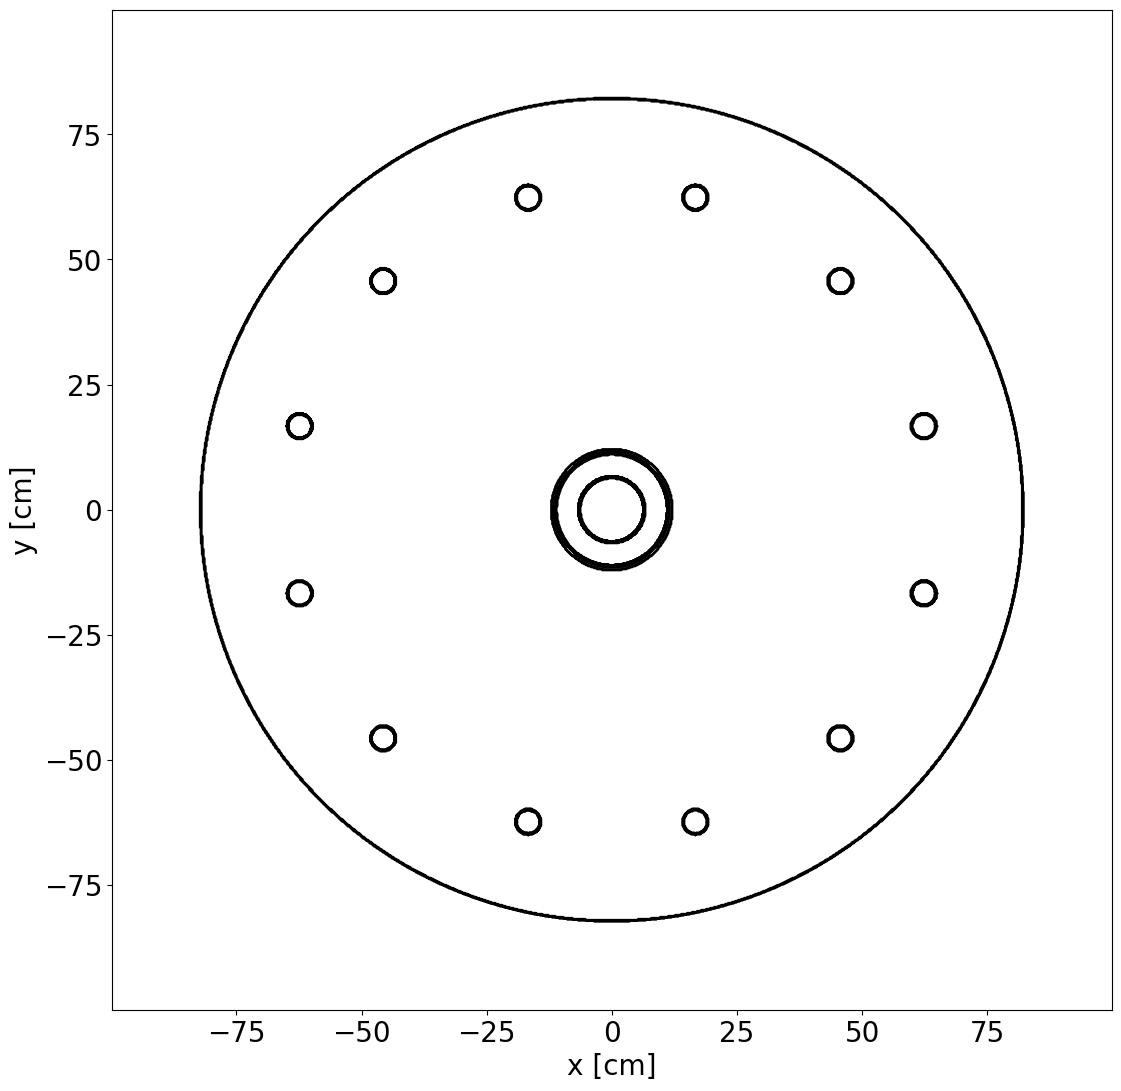

In [7]:
# Visualization
x_c = 0
y_c = 0
z_c = 30
ax = geometry.plot(
    width=(200, 200),
    origin=(x_c, y_c, z_c + 10),
    pixels=(1000, 1000),
    basis="xy",
    outline="only",
)

ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

/tmp/ipykernel_1536228/1361970773.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


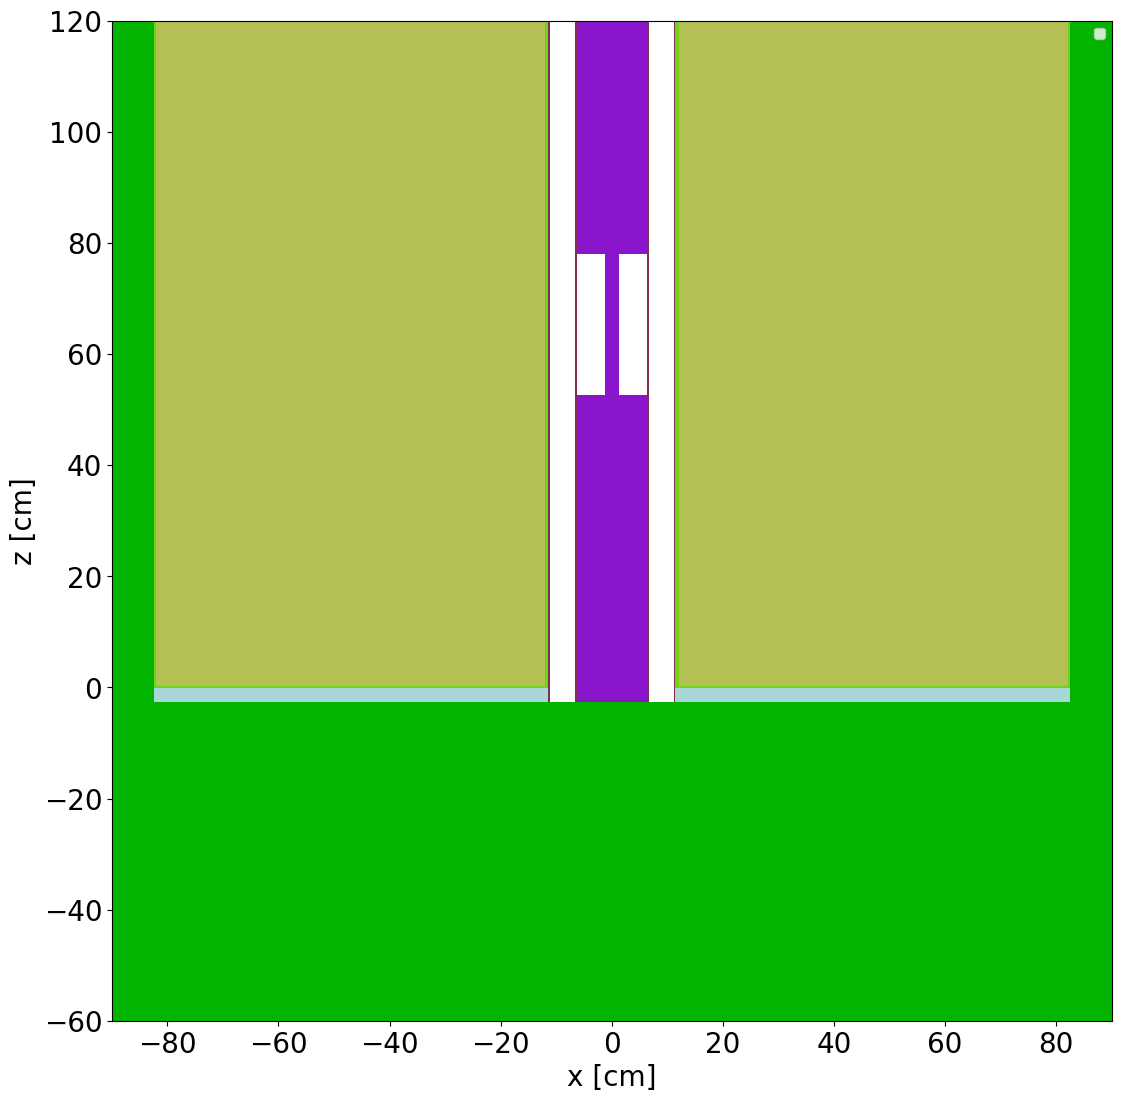

In [9]:
ax = geometry.plot(
    width=(180, 180),
    origin=(x_c, y_c, z_c),
    pixels=(1000, 1000),
    basis="xz",
    color_by="material",
    # colors={Air: "white", air: "white"},
)
plt.legend()
ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()